# 🏥 Healthcare Dataset Analysis  

We are **analyzing** the **Healthcare_Dataset**. This dataset contains **15 columns**, combining **categorical, numerical, and date-based features**, with key patient, medical, and financial details.  

## 🎯 Key Objective  
The goal is to explore relationships between **patient demographics, medical conditions, hospitalizations, and billing** to identify trends in admissions, treatment costs, and patient outcomes. Various **matplotlib** and **seaborn** visualizations will be used to derive insights.  

## 🔍 Selected Features for Analysis  

| Feature | Type | Description |  
|---------|------|-------------|  
| **Age** | Integer | Age of the patient |  
| **Gender** | Categorical | Patient gender (Male/Female) |  
| **Blood Type** | Categorical | Patient blood group (A, B, AB, O with Rh factor) |  
| **Medical Condition** | Categorical | Diagnosed medical condition |  
| **Billing Amount** | Float | Total cost of treatment |  
| **Admission Type** | Categorical | Type of admission (Emergency, Urgent, Elective) |  
| **Medication** | Categorical | Prescribed medication |  
| **Test Results** | Categorical | Medical test outcomes (Normal, Abnormal, Inconclusive) |  


## Data Understanding

In [32]:
# import the needed libraries for the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Reading the dataset and putting it in df variable
df = pd.read_csv('healthcare_dataset.csv')
df

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


In [36]:
# I want to see all the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## Data Cleaning

In [38]:
# Check for duplicate rows
df[df.duplicated]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [40]:
# Drop duplicated rows if found
df.drop_duplicates()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


### Analyzing the dataset so we can decide what features to drop or not, we the main critria is the feature must have a a few number of unique values and that drop it isn't harmful to the objective of the dataset and analysis. 

In [42]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [44]:
print(df['Blood Type'].value_counts(), '\n')
print(df['Medical Condition'].value_counts(), '\n')
print(df['Insurance Provider'].value_counts(), '\n')
print(df['Admission Type'].value_counts(), '\n')
print(df['Medication'].value_counts(), '\n')
print(df['Test Results'].value_counts(), '\n')

Blood Type
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: count, dtype: int64 

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64 

Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64 

Admission Type
Elective     18655
Urgent       18576
Emergency    18269
Name: count, dtype: int64 

Medication
Lipitor        11140
Ibuprofen      11127
Aspirin        11094
Paracetamol    11071
Penicillin     11068
Name: count, dtype: int64 

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64 



In [46]:
df['Age'].unique()

array([30, 62, 76, 28, 43, 36, 21, 20, 82, 58, 72, 38, 75, 68, 44, 46, 63,
       34, 67, 48, 59, 73, 51, 23, 78, 25, 33, 26, 70, 57, 74, 81, 49, 65,
       31, 22, 77, 42, 24, 84, 55, 40, 83, 18, 27, 19, 29, 61, 80, 60, 35,
       79, 53, 69, 47, 85, 52, 37, 50, 32, 54, 45, 66, 39, 56, 64, 71, 41,
       88, 17, 87, 86, 15, 16, 13, 14, 89], dtype=int64)

In [48]:
df['Room Number'].value_counts()

Room Number
393    181
491    177
104    175
420    175
209    171
      ... 
253    112
254    111
257    111
381    110
398    109
Name: count, Length: 400, dtype: int64

### Dates isn't useful here but there is some potnital usage for the amount of time patient will be in hospital so we will make it a new feature. 

In [50]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'], format="%Y-%m-%d")
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format="%Y-%m-%d")

df['Days Spent'] = df['Discharge Date'] - df['Date of Admission']
df['Days Spent']

0        2 days
1        6 days
2       15 days
3       30 days
4       20 days
          ...  
55495   30 days
55496    9 days
55497   28 days
55498    6 days
55499   27 days
Name: Days Spent, Length: 55500, dtype: timedelta64[ns]

In [52]:
# I will drop columns that are not useful for my use case or the ones that could cause bias.
# inplace is used to edit in the df frame, not a copy.
d_columns = ['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Room Number', 'Date of Admission', 'Discharge Date']
df.drop(columns=d_columns, inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   Age                55500 non-null  int64          
 1   Gender             55500 non-null  object         
 2   Blood Type         55500 non-null  object         
 3   Medical Condition  55500 non-null  object         
 4   Billing Amount     55500 non-null  float64        
 5   Admission Type     55500 non-null  object         
 6   Medication         55500 non-null  object         
 7   Test Results       55500 non-null  object         
 8   Days Spent         55500 non-null  timedelta64[ns]
dtypes: float64(1), int64(1), object(6), timedelta64[ns](1)
memory usage: 3.8+ MB


There is no NAN values

In [56]:
df.isna().sum()

Age                  0
Gender               0
Blood Type           0
Medical Condition    0
Billing Amount       0
Admission Type       0
Medication           0
Test Results         0
Days Spent           0
dtype: int64

In [62]:
df.describe()

,Age,Billing Amount,Days Spent
count,55500.000000,55500.000000,55500
mean,51.539459,25539.316097,15 days 12:12:58.378378378
std,19.602454,14211.454431,8 days 15:49:49.456115772
min,13.000000,-2008.492140,1 days 00:00:00
25%,35.000000,13241.224652,8 days 00:00:00
50%,52.000000,25538.069376,15 days 00:00:00
75%,68.000000,37820.508436,23 days 00:00:00
max,89.000000,52764.276736,30 days 00:00:00


## Data Analysis using visualization techniques

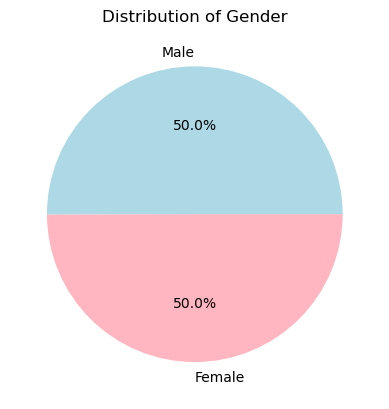

Gender
Male      27774
Female    27726
Name: count, dtype: int64

In [139]:
# Count occurrences of the needed column value
counts = df['Gender'].value_counts()

# Filter out categories with 0 values
counts = counts[counts > 0]

# Plot the Pie Chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])

plt.title("Distribution of Gender")
plt.show()
df['Gender'].value_counts()

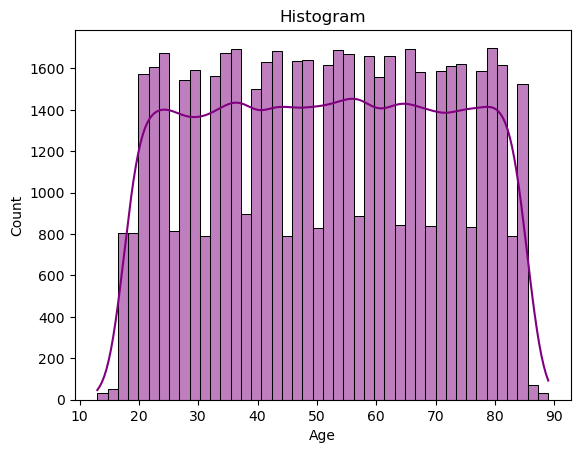

In [75]:
sns.histplot(data = df, x=df['Age'], color='purple', kde=True)
plt.title('Histogram')
plt.show()

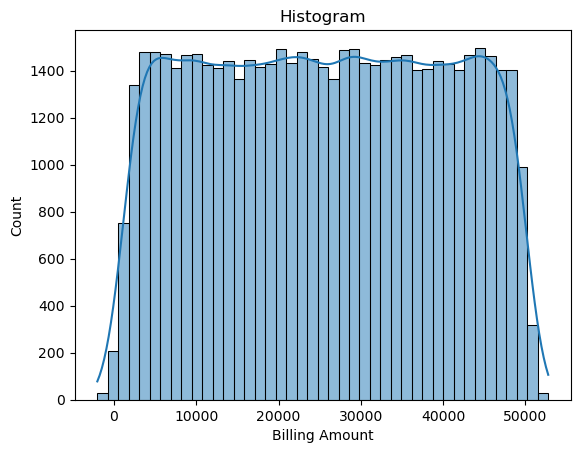

In [81]:
sns.histplot(data = df, x=df['Billing Amount'], kde=True)
plt.title('Histogram')
plt.show()

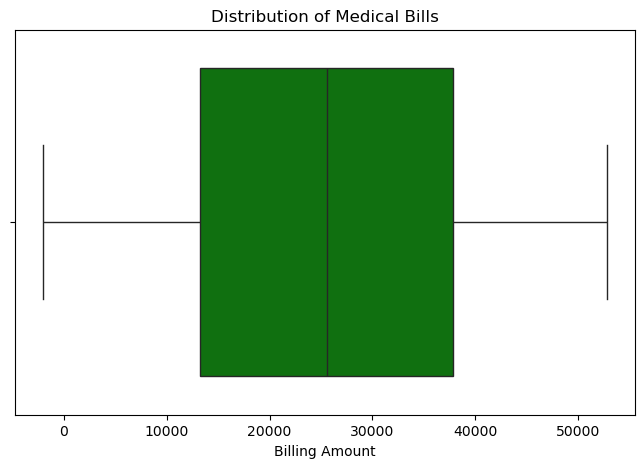

In [88]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Billing Amount"], color="green")
plt.xlabel("Billing Amount")
plt.title("Distribution of Medical Bills")
plt.show()

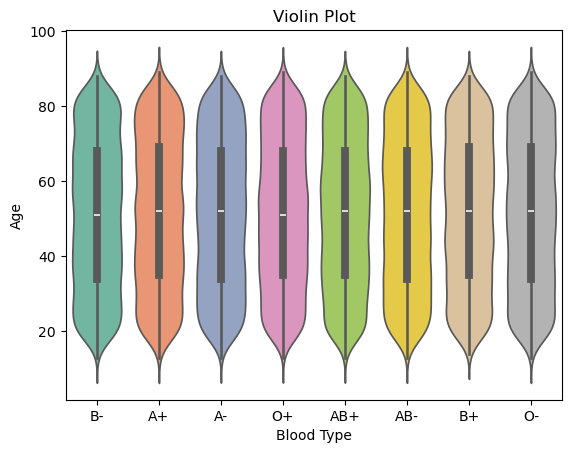

In [132]:
sns.violinplot(x=df['Blood Type'], y=df['Age'], hue=df['Blood Type'], palette='Set2')
plt.title('Violin Plot')
plt.show()

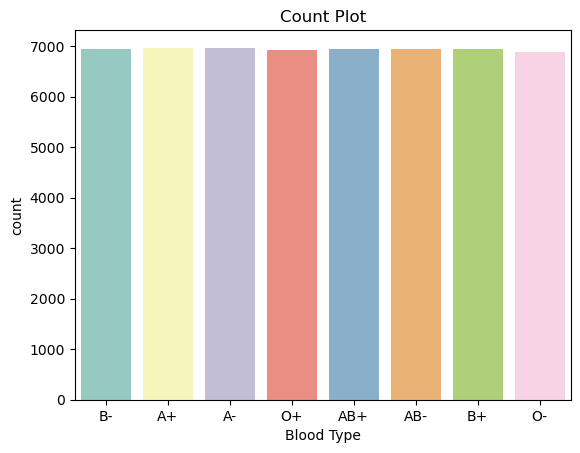

In [134]:
sns.countplot(x=df['Blood Type'], hue=df['Blood Type'], palette='Set3')
plt.title('Count Plot')
plt.show()

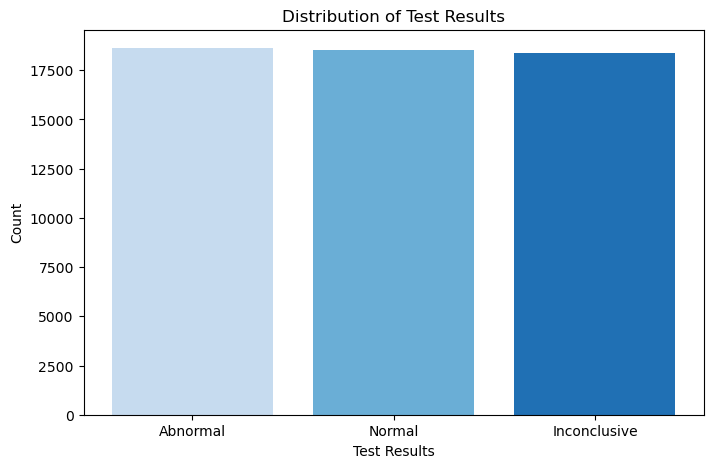

In [68]:
test_results_counts = df["Test Results"].value_counts()

colors = sns.color_palette("Blues", len(test_results_counts))

plt.figure(figsize=(8, 5))
plt.bar(test_results_counts.index, test_results_counts.values, color=colors)

plt.xlabel("Test Results")
plt.ylabel("Count")
plt.title("Distribution of Test Results")

plt.show()

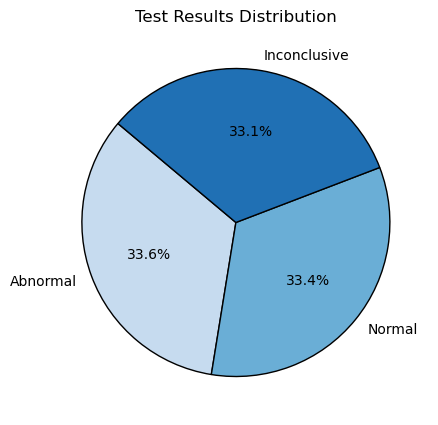

In [101]:
plt.figure(figsize=(5, 5))
plt.pie(
    test_results_counts.values, 
    labels=test_results_counts.index, 
    autopct="%1.1f%%", 
    colors=sns.color_palette("Blues", len(test_results_counts)), 
    startangle=140, 
    wedgeprops={"edgecolor": "black"}  # Adding stroke to the figure 
)

plt.title("Test Results Distribution")

plt.show()

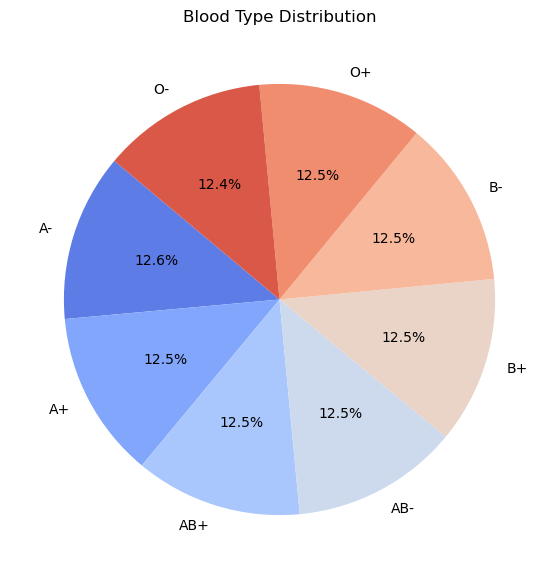

In [80]:
blood_type_counts = df["Blood Type"].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(blood_type_counts.values, labels=blood_type_counts.index, autopct="%1.1f%%", 
        colors=sns.color_palette("coolwarm", len(blood_type_counts)), startangle=140)
plt.title("Blood Type Distribution")
plt.show()

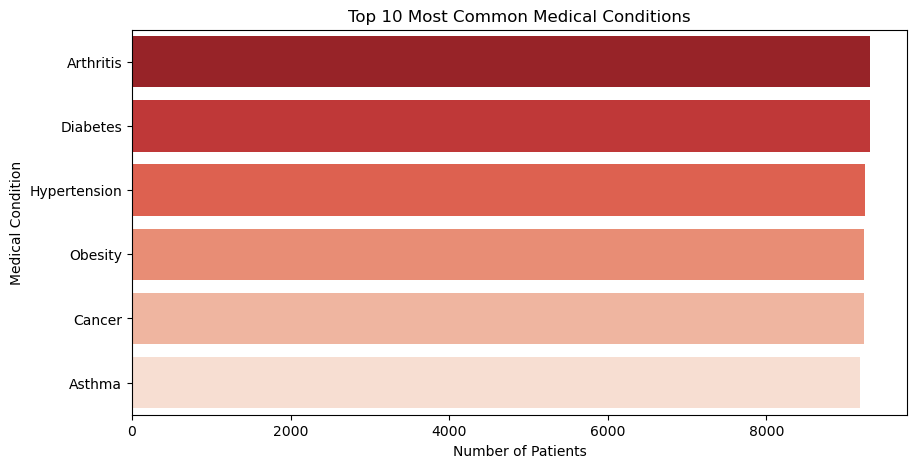

In [86]:
condition_counts = df["Medical Condition"].value_counts().head(10)  
plt.figure(figsize=(10, 5))
sns.barplot(x=condition_counts.values, y=condition_counts.index, palette="Reds_r", hue=condition_counts.index)
plt.xlabel("Number of Patients")
plt.ylabel("Medical Condition")
plt.title("Top 10 Most Common Medical Conditions")
plt.show()

<Axes: xlabel='Medical Condition', ylabel='Age'>

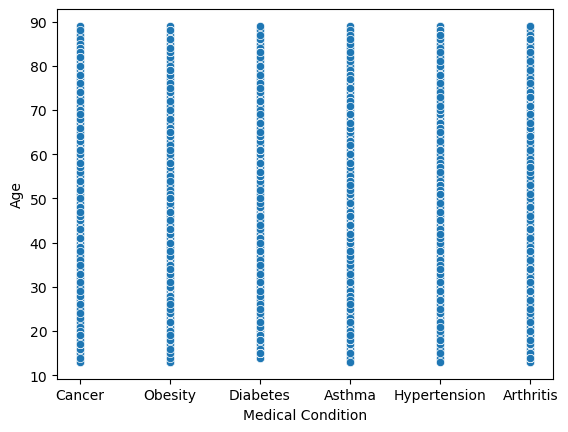

In [90]:
sns.scatterplot(x="Medical Condition",y="Age",data=df)

<Axes: xlabel='Age', ylabel='Medical Condition'>

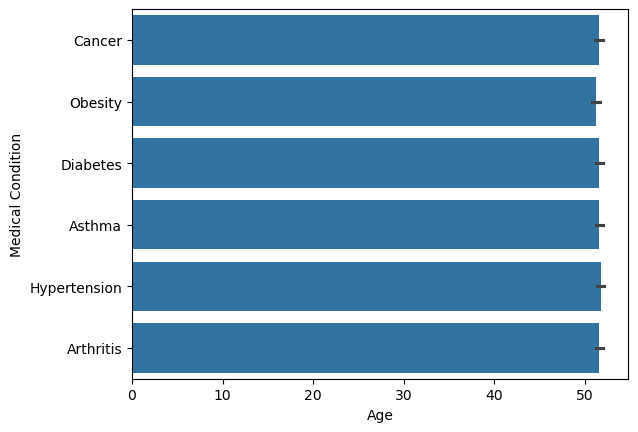

In [109]:
sns.barplot(x="Age",y="Medical Condition",data=df)

<Axes: xlabel='Age', ylabel='Medical Condition'>

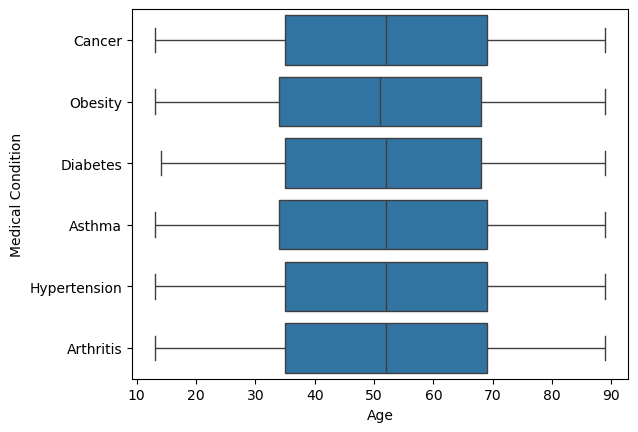

In [105]:
sns.boxplot(x="Age",y="Medical Condition",data=df)

<Axes: xlabel='Age', ylabel='Test Results'>

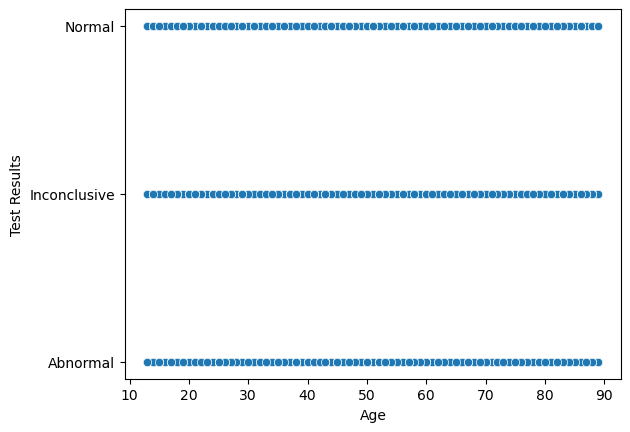

In [111]:
sns.scatterplot(x="Age",y="Test Results",data=df)

<Axes: xlabel='Age', ylabel='Test Results'>

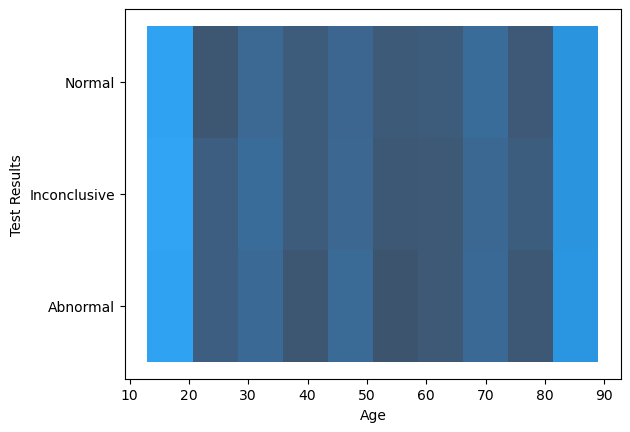

In [113]:
sns.histplot(x="Age",y="Test Results",bins=10,data=df)

<Axes: xlabel='Age', ylabel='Test Results'>

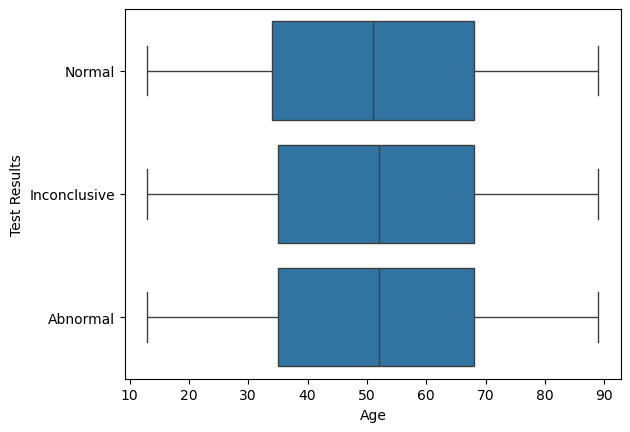

In [117]:
sns.boxplot(x="Age",y="Test Results",data=df)

<Axes: xlabel='Age', ylabel='Medication'>

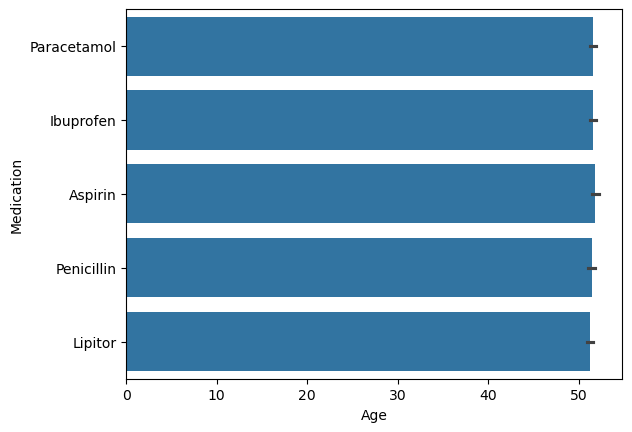

In [121]:
sns.barplot(x="Age",y="Medication",data=df)

<Axes: xlabel='Age', ylabel='Medication'>

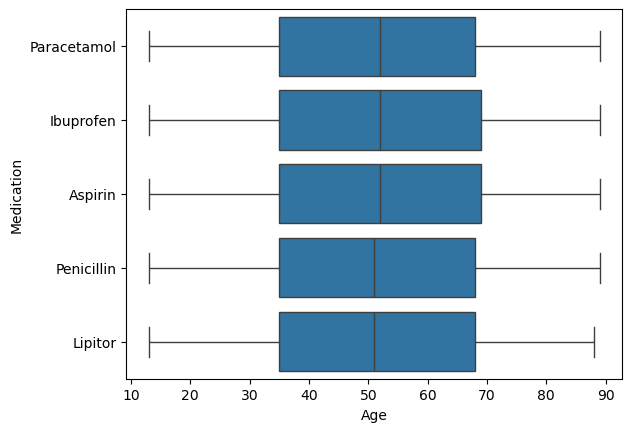

In [123]:
sns.boxplot(x="Age",y="Medication",data=df)

<Axes: xlabel='Age', ylabel='Medication'>

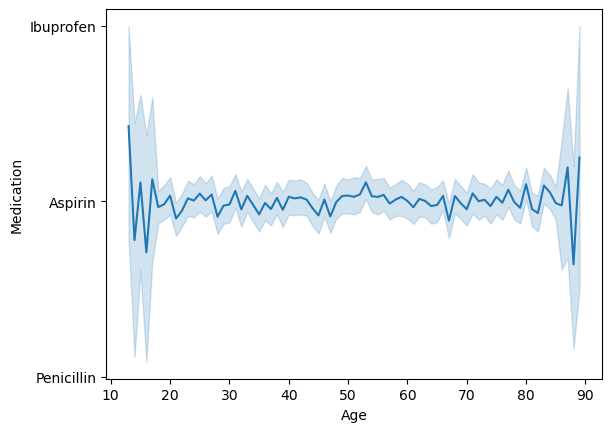

In [125]:
sns.lineplot(x="Age",y="Medication",data=df)

<Axes: xlabel='Age', ylabel='Test Results'>

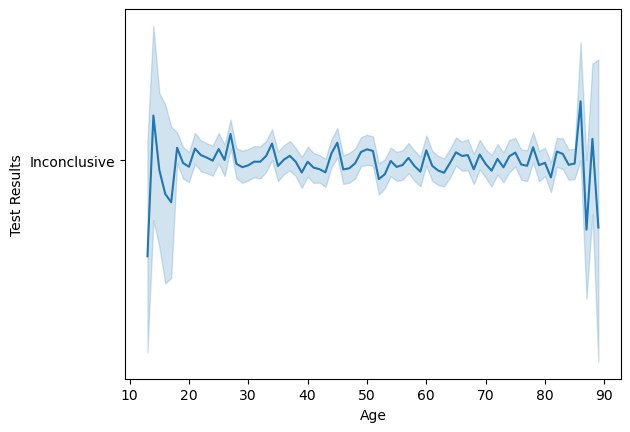

In [127]:
sns.lineplot(x="Age",y="Test Results",data=df)

<Axes: xlabel='Age', ylabel='Medical Condition'>

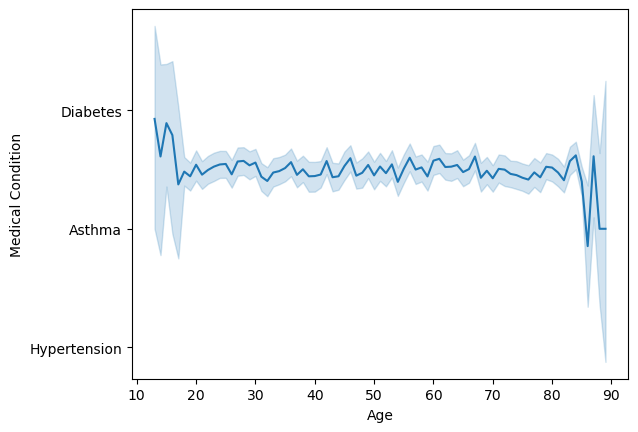

In [129]:
sns.lineplot(x="Age",y="Medical Condition",data=df)

<Axes: xlabel='Medical Condition', ylabel='count'>

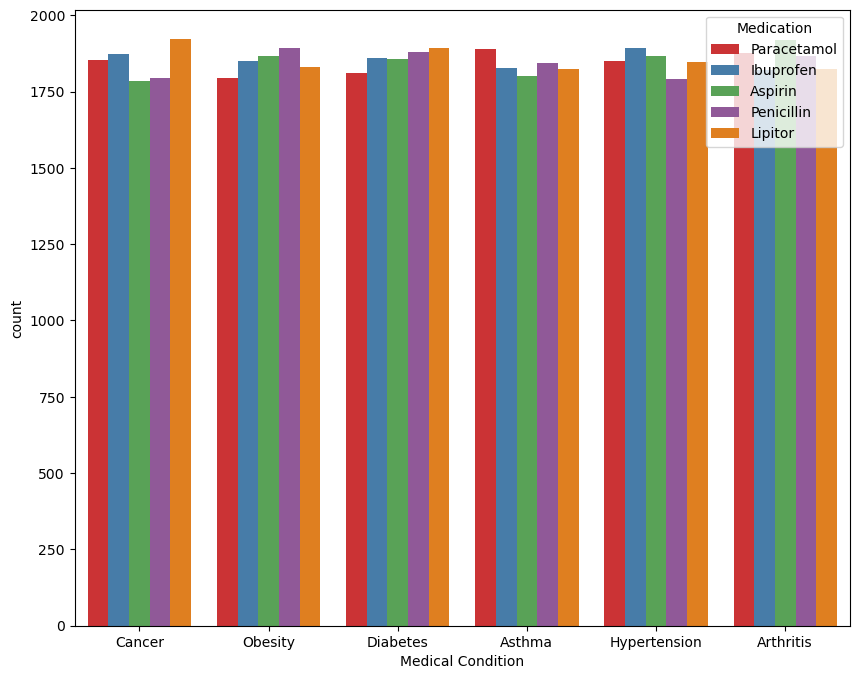

In [64]:
plt.figure(figsize=(10,8))
sns.countplot(x='Medical Condition', hue='Medication', data=df, palette='Set1')

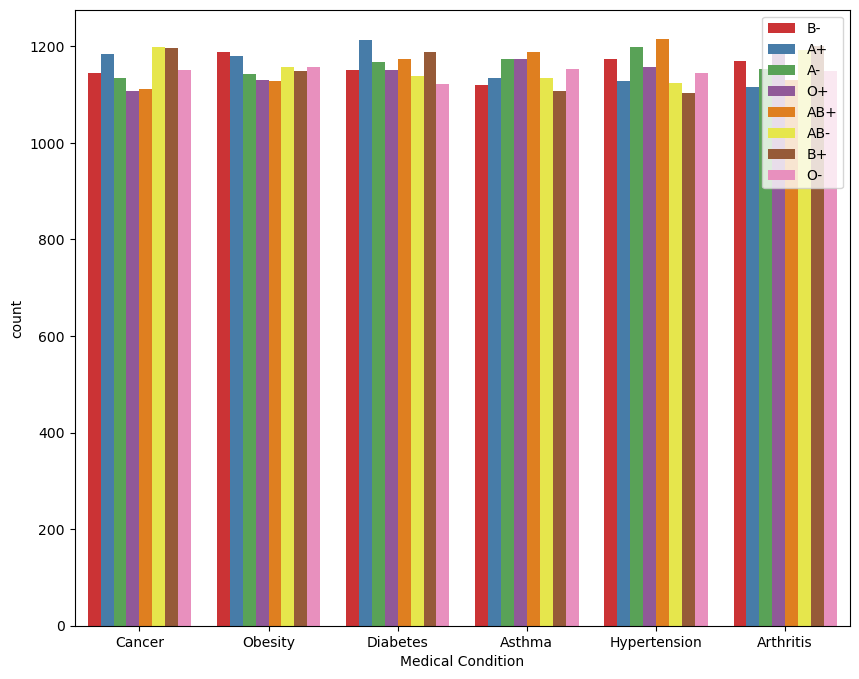

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(x='Medical Condition', hue='Blood Type', data=df, palette='Set1')
plt.legend(loc='upper right')
plt.show()

In [136]:
# Group by Gender, Medical Condition, and Test Result
condition_counts = df.groupby(["Gender", "Medical Condition", "Test Results"]).size().unstack(fill_value=0)

# Extract counts for Male and Female
male = condition_counts.xs("Male", level=0).sum().sum() if "Male" in df["Gender"].values else 0
female = condition_counts.xs("Female", level=0).sum().sum() if "Female" in df["Gender"].values else 0

# Function to get counts for a specific condition and test result
def get_count(gender, condition, result):
    try:
        return condition_counts.at[(gender, condition), result] if result in condition_counts.columns else 0
    except KeyError:
        return 0  # Return 0 if the condition or test result is missing

# Define medical conditions and test results
conditions = ["Hypertension", "Diabetes", "Cancer", "Asthma", "Obesity", "Arthritis"]
test_results = ["Normal", "Abnormal", "Inconclusive"]

# Create dictionaries for better organization
male_counts = {cond: {res: get_count("Male", cond, res) for res in test_results} for cond in conditions}
female_counts = {cond: {res: get_count("Female", cond, res) for res in test_results} for cond in conditions}

# Print example: Male Hypertension with test results
print("Male Hypertension:", male_counts["Hypertension"])
print("Female Hypertension:", female_counts["Hypertension"])


Male Hypertension: {'Normal': 1600, 'Abnormal': 1504, 'Inconclusive': 1529}
Female Hypertension: {'Normal': 1542, 'Abnormal': 1508, 'Inconclusive': 1562}


In [159]:
# Group by Medical Condition and Test Result (excluding Gender)
condition_counts = df.groupby(["Medical Condition", "Test Results"]).size().unstack(fill_value=0)

# Define medical conditions and test results
conditions = df["Medical Condition"].unique()  # Dynamically detect conditions
test_results = ["Normal", "Abnormal", "Inconclusive"]

# Function to safely extract counts
def get_count(condition, result):
    return condition_counts.loc[condition, result] if condition in condition_counts.index and result in condition_counts.columns else 0

# Create a dictionary without gender breakdown
condition_counts_dict = {cond: {res: get_count(cond, res) for res in test_results} for cond in conditions}

# Print example: Hypertension test results
print("Hypertension Test Results:", condition_counts_dict.get("Hypertension", {}))

Hypertension Test Results: {'Normal': 3142, 'Abnormal': 3012, 'Inconclusive': 3091}


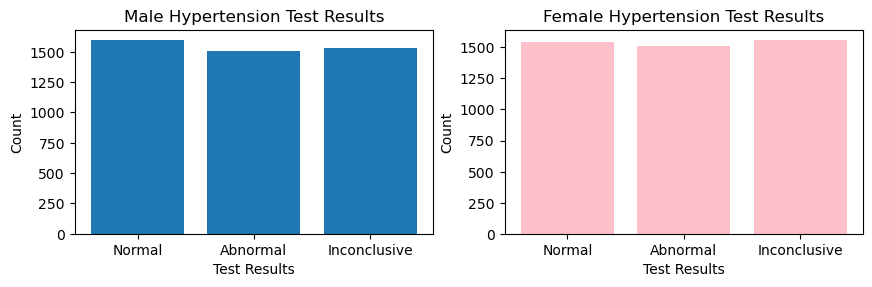

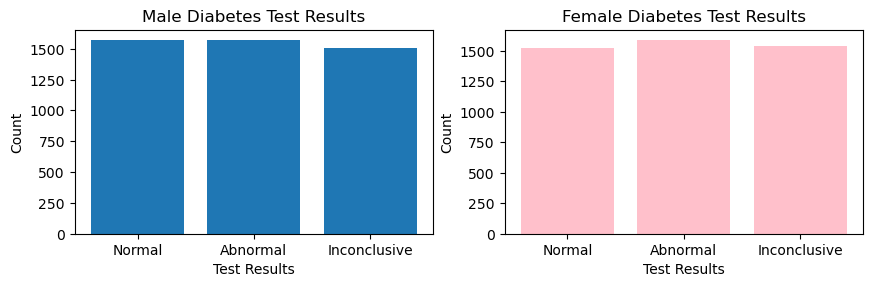

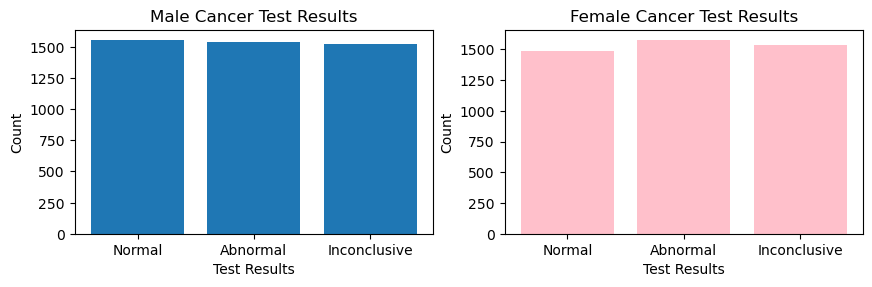

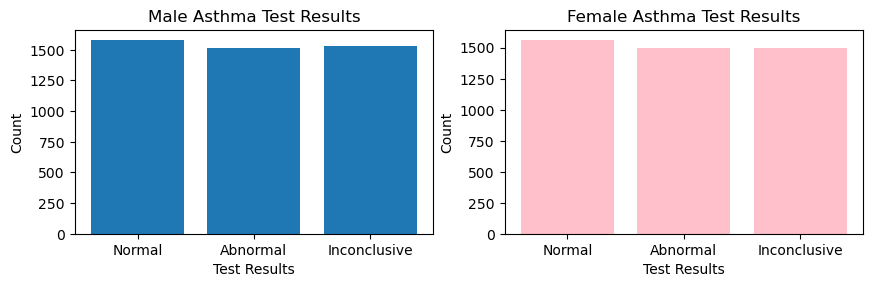

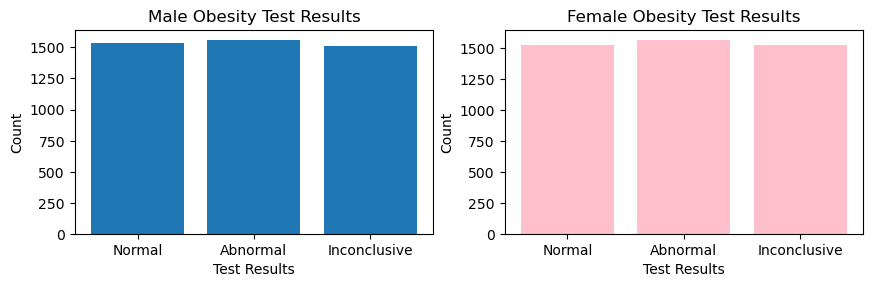

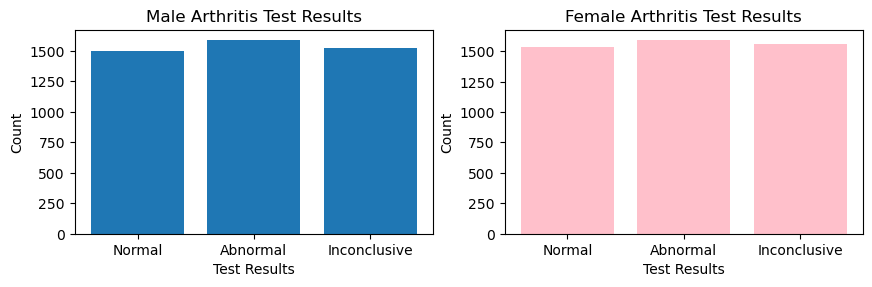

In [141]:
i=1
for condition in male_counts:
    male_values = list(male_counts[condition].values())
    female_values = list(female_counts[condition].values())
    labels = list(male_counts[condition].keys())
    
    figure = plt.figure(figsize=(49,9))
    plt.subplot(3, 9, i)
    # Plot for male counts
    plt.bar(x=labels, height=male_values)
    plt.title(f"Male {condition} Test Results")
    plt.xlabel("Test Results")
    plt.ylabel("Count")
    plt.plot()
    
    plt.subplot(3, 9, i + 1)
    # Plot for female counts
    plt.bar(x=labels, height=female_values, color="pink")
    plt.title(f"Female {condition} Test Results")
    plt.xlabel("Test Results")
    plt.ylabel("Count")
    plt.plot()
    i += 1

## Analysis result 
- The data is very clean and symmetric.
- The data is equally divided across a lot of features.
- The data has several features; however, there are no common medical measure tests like BMI, Blood pressure, and the sugar tests, which suggests that this data could be incompatible with making a good prediction model in the real world.  

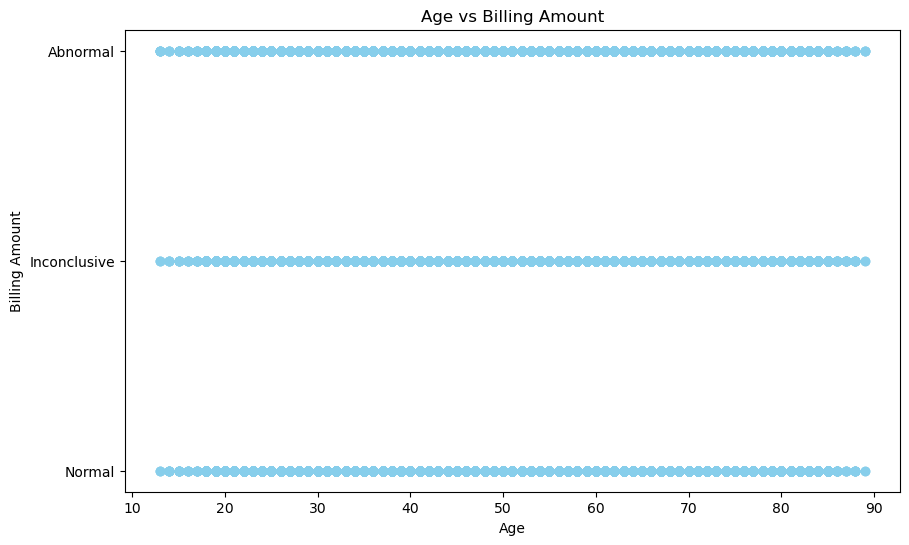

In [149]:
#scatter plot for age and billing amount
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Test Results'], color='skyblue')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.title('Age vs Billing Amount')
plt.show()

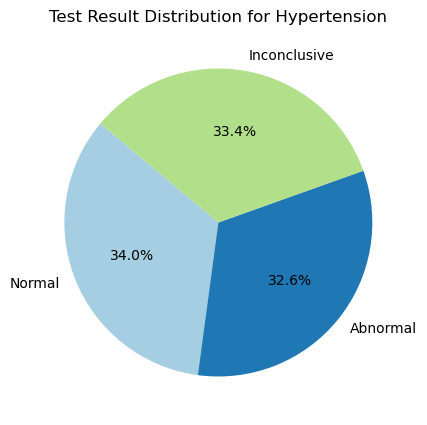

In [153]:
# Choose a medical condition to visualize
selected_condition = "Hypertension"

# Sum test result counts for the selected condition
test_results = ["Normal", "Abnormal", "Inconclusive"]
values = [condition_counts_dict[selected_condition][res] for res in test_results]

# Remove zero values for clarity
labels, values = zip(*[(label, value) for label, value in zip(test_results, values) if value > 0])

# Create Pie Chart
plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title(f"Test Result Distribution for {selected_condition}")
plt.show()

<Figure size 1600x1200 with 0 Axes>

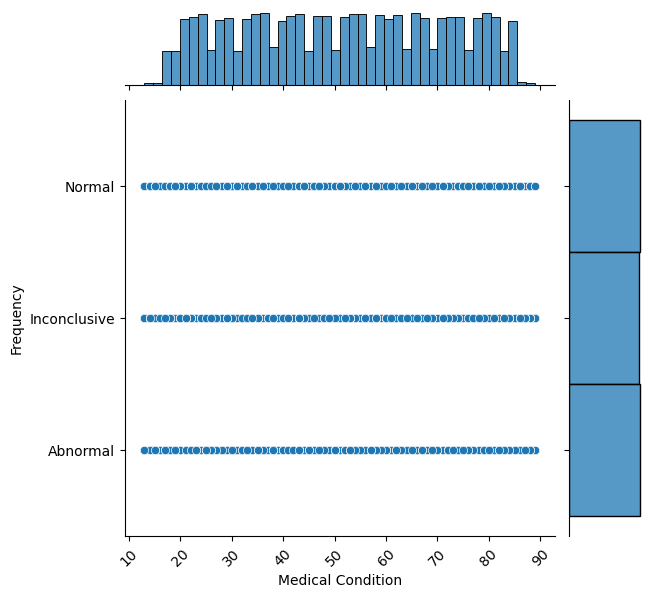

In [155]:
plt.figure(figsize=(16, 12))
sns.jointplot(data=df, x='Age', y='Test Results', kind='scatter')
plt.xlabel("Medical Condition")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

## Insights

### 📊 Distribution of Medical Conditions by Age  

- **Feature**: Medical Condition  
- **Target**: Age  
- **Chart**: Pie Chart  
- **Purpose**: To analyze the distribution of different medical conditions across all ages.  
- **Insight**: This visualization helps in identifying gender-based trends in common medical conditions such as hypertension, diabetes, cancer, asthma, obesity, and arthritis.  

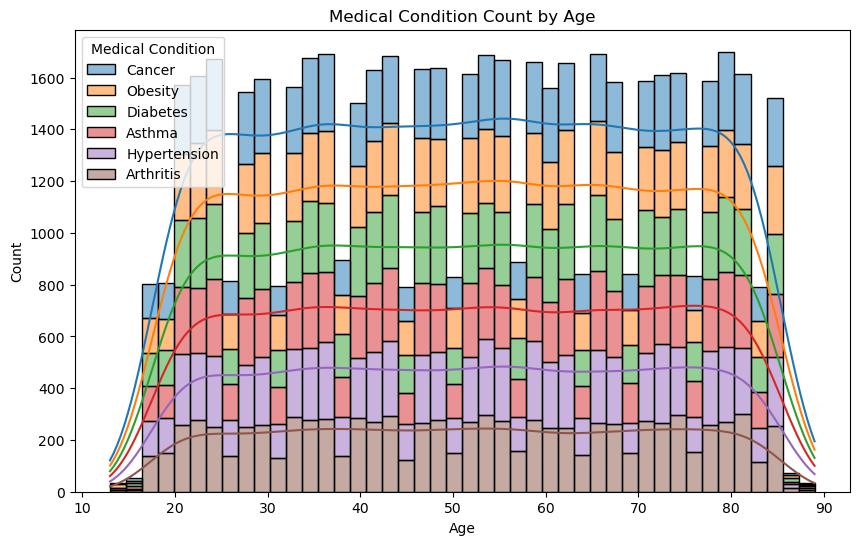

In [147]:
#implement histogram for medical condition and age
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Medical Condition', multiple='stack',kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Medical Condition Count by Age')
plt.show()

## Encoding 

Still working on that part, this is just a try...

In [ ]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('dataset1.csv')

le=LabelEncoder()
enco=['Gender','Medical Condition','Admission Type','Medication','Test Results','Blood Type']
for i in enco:
    df[i]=le.fit_transform(df[i])
df


#    Admission Type       1=Emergency, 0=Elective, 2=Urgent
#    Test Result          2=Normal, 0=Abnormal, 1=Inconclusive
#    Medication           Paracetamol=3, Ibuprofen=1, Aspirin=0,  2=Lipitor, 4=Penicillin
#    Medical Condition    4=Hypertension, 5=Obesity, 3=Diabetes, 2=Cancer, 1=Asthma, 0=Arthritis
#    Gender               1=male, 0=female
df.drop_duplicates(inplace=True)
df

In [ ]:
dfcorrelat=df.corr()
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,9))
sns.heatmap(dfcorrelat,annot=True,cmap='coolwarm')
plt.title('Correlation between different attributes')
plt.show()

## Model Selection 

## The End